In [1]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf 

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import sklearn 

In [3]:
base_dir = r"/Users/niharpatel/Desktop/Data"

In [4]:
#geographically describe the location where the potholes occurs 
#add details of the pothole in the database for fixing the potholes
#real time detection 
#integration with traffic data for pothole formation 
#Integration with weather data for prone 

In [5]:
# #Converting to JPG to JPEG
# #PLAIN IMAGES 
# from PIL import Image
# import os

# # Set the folder paths
# source_folder = "/Users/niharpatel/Desktop/Data/Plain"
# dest_folder = "/Users/niharpatel/Desktop/Data/PLAIN_JPEG"

# # Loop through each file in the source folder
# for filename in os.listdir(source_folder):
#     if filename.endswith(".jpg"):
#         # Open the image file
#         filepath = os.path.join(source_folder, filename)
#         with Image.open(filepath) as im:
#             # Convert the image to JPEG format
#             dest_filename = os.path.splitext(filename)[0] + ".jpeg"
#             dest_filepath = os.path.join(dest_folder, dest_filename)
#             im.convert("RGB").save(dest_filepath, "JPEG")
            


In [6]:
# source1_folder = "/Users/niharpatel/Desktop/Data/Pothole"
# dest1_folder = "/Users/niharpatel/Desktop/Data/POTHOLE_JPEG"

# # Loop through each file in the source folder
# for filename in os.listdir(source1_folder):
#     if filename.endswith(".jpg"):
#         # Open the image file
#         filepath = os.path.join(source1_folder, filename)
#         with Image.open(filepath) as im:
#             # Convert the image to JPEG format
#             dest_filename = os.path.splitext(filename)[0] + ".jpeg"
#             dest_filepath = os.path.join(dest1_folder, dest_filename)
#             im.convert("RGB").save(dest_filepath, "JPEG")
            

In [7]:
data_dire = "/Users/niharpatel/Desktop/Data"

In [8]:
Data = tf.keras.utils.image_dataset_from_directory(data_dire,
                                                  labels='inferred',
                                                  label_mode='int',
                                                  color_mode ='rgb',
                                                  batch_size=15,
                                                  image_size=(224,224),
                                                  shuffle=True,
                                                  )

Found 968 files belonging to 2 classes.


In [9]:
Data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
Data = Data.map(lambda x,y:(x/255,y))

In [11]:
scaled_iterator = Data.as_numpy_iterator()

In [12]:
batch = scaled_iterator.next()

In [13]:
batch[1][:]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int32)

In [14]:
import matplotlib.pyplot as plt

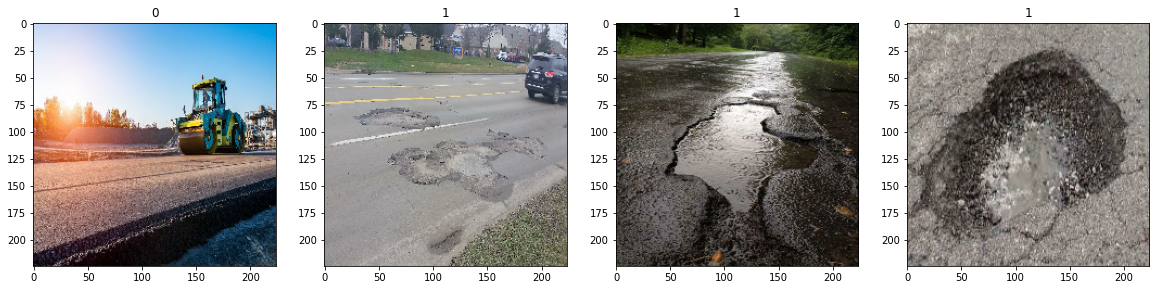

In [15]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))

for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [16]:
L = ['Plain','Pothole']

In [17]:
len(Data)

65

In [18]:
train_size = int(len(Data)*.6)
val_size = int(len(Data)*.4)

In [19]:
print(train_size)

39


In [20]:
print(val_size)

26


In [21]:
train= Data.take(train_size)
val = Data.skip(train_size).take(val_size)

In [22]:
IMG_SHAPE = (224,224) + (3,)
base_model = tf.keras.applications.Xception(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [23]:
base_model.trainable = False

In [24]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [25]:
image_batch, label_batch = next(iter(train))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(15, 7, 7, 2048)


In [26]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(15, 2048)


In [27]:
preprocess_input = tf.keras.applications.xception.preprocess_input

In [28]:
prediction_layer = tf.keras.layers.Dense(2)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(15, 2)


In [29]:
inputs = tf.keras.Input(shape=(224, 224, 3))

x = (inputs)
x = preprocess_input(x)
x = base_model(x, training=True)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [30]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                             

In [32]:
history = model.fit(train,
                    epochs=25,
                    validation_data=val)

Epoch 1/25
39/39 [==============================] - 18s 438ms/step - loss: 0.6781 - accuracy: 0.5761 - val_loss: 0.6464 - val_accuracy: 0.6501
Epoch 2/25
39/39 [==============================] - 17s 417ms/step - loss: 0.6583 - accuracy: 0.6291 - val_loss: 0.6455 - val_accuracy: 0.6449
Epoch 3/25
39/39 [==============================] - 17s 423ms/step - loss: 0.6495 - accuracy: 0.6376 - val_loss: 0.6464 - val_accuracy: 0.6319
Epoch 4/25
39/39 [==============================] - 17s 428ms/step - loss: 0.6453 - accuracy: 0.6359 - val_loss: 0.6388 - val_accuracy: 0.6397
Epoch 5/25
39/39 [==============================] - 17s 432ms/step - loss: 0.6433 - accuracy: 0.6393 - val_loss: 0.6250 - val_accuracy: 0.6606
Epoch 6/25
39/39 [==============================] - 17s 433ms/step - loss: 0.6398 - accuracy: 0.6274 - val_loss: 0.6288 - val_accuracy: 0.6423
Epoch 7/25
39/39 [==============================] - 17s 433ms/step - loss: 0.6358 - accuracy: 0.6393 - val_loss: 0.6258 - val_accuracy: 0.6397

In [33]:
base_model.trainable = True

In [34]:
print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model:  132


In [35]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [36]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                             

In [37]:
history_fine = model.fit(train,
                         epochs=10,
                         validation_data=val)

Epoch 1/10
39/39 [==============================] - 27s 596ms/step - loss: 1.1527 - accuracy: 0.6718 - val_loss: 0.4453 - val_accuracy: 0.8146
Epoch 2/10
39/39 [==============================] - 22s 559ms/step - loss: 0.5897 - accuracy: 0.7556 - val_loss: 0.3289 - val_accuracy: 0.8668
Epoch 3/10
39/39 [==============================] - 23s 568ms/step - loss: 0.3893 - accuracy: 0.8308 - val_loss: 0.3670 - val_accuracy: 0.8407
Epoch 4/10
39/39 [==============================] - 22s 563ms/step - loss: 0.3243 - accuracy: 0.8684 - val_loss: 0.2401 - val_accuracy: 0.8877
Epoch 5/10
39/39 [==============================] - 22s 559ms/step - loss: 0.2561 - accuracy: 0.8923 - val_loss: 0.2864 - val_accuracy: 0.8773
Epoch 6/10
39/39 [==============================] - 23s 565ms/step - loss: 0.2797 - accuracy: 0.9214 - val_loss: 0.2885 - val_accuracy: 0.8747
Epoch 7/10
39/39 [==============================] - 24s 586ms/step - loss: 0.1915 - accuracy: 0.9231 - val_loss: 0.6416 - val_accuracy: 0.6841

In [38]:
model.save('pothole_fcl2.h5')

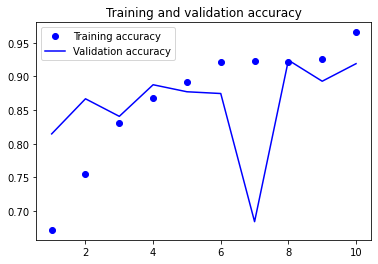

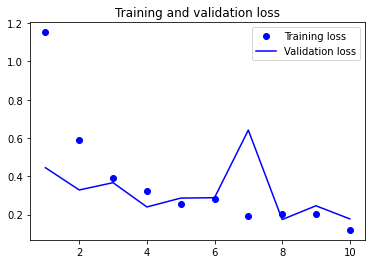

In [39]:
import matplotlib.pyplot as plt

acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [40]:
loaded_model = tf.keras.models.load_model('pothole_fcl.h5')

In [41]:
num_clients = 5
client_datasets = [Data.shard(num_clients, i) for i in range(num_clients)]

In [42]:
len(client_datasets[1])


13

In [43]:
for i in range(num_clients):
    client_datasets[i] = client_datasets[i].map(lambda x,y:(x/255,y))

In [44]:
client_datasets[2]

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [45]:
iterators = []
for i in range(num_clients):
    scaled_iterator = client_datasets[i].as_numpy_iterator()
    iterators.append(scaled_iterator)

In [46]:
iterators

In [47]:
batches =[]
for i in range(num_clients):
    batch = iterators[i].next()
    batches.append(batch)

In [48]:
batches[2]

(array([[[[1.5196718e-03, 1.6427013e-03, 1.2874465e-03],
          [2.0305377e-03, 2.0317093e-03, 1.9270109e-03],
          [1.7630341e-03, 1.6937956e-03, 1.5720753e-03],
          ...,
          [2.2202423e-03, 2.4739571e-03, 1.4668213e-03],
          [2.0635985e-03, 2.2789005e-03, 1.3500678e-03],
          [1.7979845e-03, 2.0132861e-03, 1.1995387e-03]],
 
         [[1.3125447e-03, 1.3894382e-03, 1.0787747e-03],
          [2.2325057e-03, 2.2299166e-03, 2.0973783e-03],
          [2.4992202e-03, 2.4157753e-03, 2.2478208e-03],
          ...,
          [1.9890117e-03, 2.2405391e-03, 1.2399651e-03],
          [1.9379272e-03, 2.1485949e-03, 1.2424524e-03],
          [1.8361621e-03, 2.0470698e-03, 1.2869316e-03]],
 
         [[2.0549495e-03, 2.1010856e-03, 1.8365582e-03],
          [1.9627167e-03, 1.9276242e-03, 1.8016767e-03],
          [1.9412617e-03, 1.8402215e-03, 1.6042693e-03],
          ...,
          [1.9178761e-03, 2.1639352e-03, 1.1808693e-03],
          [1.7776851e-03, 1.9883530e-

In [49]:
train_size0 = int(len(client_datasets[0])*.6)
val_size0 = int(len(client_datasets[0])*.4)

In [50]:
train_size1 = int(len(client_datasets[1])*.6)
val_size1 = int(len(client_datasets[1])*.4)

In [51]:
train_size2 = int(len(client_datasets[2])*.6)
val_size2 = int(len(client_datasets[2])*.4)

In [52]:
train_size3 = int(len(client_datasets[3])*.6)
val_size3 = int(len(client_datasets[3])*.4)

In [53]:
train_size4 = int(len(client_datasets[4])*.6)
val_size4 = int(len(client_datasets[4])*.4)

In [54]:
print(train_size3)

7


In [55]:
print(val_size3)

5


In [56]:
train0= client_datasets[0].take(train_size0)
val0 = client_datasets[0].skip(train_size0).take(val_size0)

In [57]:
train1= client_datasets[1].take(train_size1)
val1 = client_datasets[1].skip(train_size1).take(val_size1)

In [58]:
train2= client_datasets[2].take(train_size2)
val2 = client_datasets[2].skip(train_size2).take(val_size2)

In [59]:
train3= client_datasets[3].take(train_size3)
val3 = client_datasets[3].skip(train_size3).take(val_size3)

In [60]:
train4= client_datasets[4].take(train_size4)
val4 = client_datasets[4].skip(train_size4).take(val_size4)

In [61]:
def create_models(train,val):
    IMG_SHAPE =  (224,224) + (3,)
    base_model = tf.keras.applications.Xception(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
    base_model.trainable =False
    image_batch, label_batch = next(iter(train))
    feature_batch = base_model(image_batch)
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    feature_batch_average = global_average_layer(feature_batch)
    preprocess_input = tf.keras.applications.xception.preprocess_input
    prediction_layer = tf.keras.layers.Dense(2)
    prediction_batch = prediction_layer(feature_batch_average)
    
    inputs = tf.keras.Input(shape=(224, 224, 3))

    x = (inputs)
    x = preprocess_input(x)
    x = base_model(x, training=True)
    x = global_average_layer(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)
    base_learning_rate = 0.001
    
    return model
    

In [62]:
client_models = []
client_models.append(create_models(train0,val0))
client_models.append(create_models(train1,val1))
client_models.append(create_models(train2,val2))
client_models.append(create_models(train3,val3))
client_models.append(create_models(train4,val4))

In [63]:
client_models

In [64]:
sanjana_data = []
sanjana_data.append((train0,val0))
sanjana_data.append((train1,val1))
sanjana_data.append((train2,val2))
sanjana_data.append((train3,val3))
sanjana_data.append((train4,val4))

In [65]:
sanjana_data

[(<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
  <_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>),
 (<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
  <_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>),
 (<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
  <_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>),
 (<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype

In [66]:
global_weights = create_models(train4,val4).get_weights()

In [67]:
global_weights

[array([[[[ 4.01871502e-01,  6.77069500e-02, -9.92160812e-02,
           -2.40881741e-01,  4.94409263e-01, -1.35092044e+00,
           -7.53455386e-02, -1.15802072e-01,  2.54089713e-01,
            4.12381589e-01, -2.02945337e-01, -5.65736771e-01,
            1.53094187e-01, -5.43646663e-02,  9.78396833e-02,
           -2.72699267e-01, -9.39905122e-02,  3.93782228e-01,
            3.33525687e-01,  2.95914084e-01, -3.14331800e-02,
           -1.99261308e-01,  1.59772888e-01, -3.25841278e-01,
           -1.50597319e-01, -7.27500841e-02,  1.80662051e-02,
            3.05232316e-01,  8.96351188e-02,  2.89342284e-01,
           -2.50950217e-01, -7.65512884e-01],
          [ 4.84812856e-02,  4.23621461e-02,  4.00314759e-03,
           -3.78118306e-02, -5.52299500e-01,  7.35755444e-01,
           -3.38940531e-01, -1.09324297e-02, -8.63540769e-02,
           -7.23446161e-02, -5.50143421e-01, -5.00105917e-01,
            2.29335129e-01,  2.17402652e-01, -1.51911721e-01,
           -3.03186446e-

In [68]:
num_clients = 5
epochs_per_round = 5
num_rounds = 5

In [69]:
for data in sanjana_data:
    print(len(data[0]))
    print(len(data[1]))

7
5
7
5
7
5
7
5
7
5


In [70]:
for i in range(num_clients):
    client_models[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
sanjana_data[1]

(<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [83]:
client_weights = []
for j in range(num_clients):
    print("Client No: ",i+1)
    print("\n")
    for i in range(2):
        print("Round No : ",i)
        print("\n")
        for data in sanjana_data[j]:
            client_models[j].fit(data,
                             epochs=10,
                             validation_data=data)

Client No:  1


Round No :  0


Epoch 1/10
7/7 [==============================] - 5s 649ms/step - loss: 0.7072 - accuracy: 0.5714 - val_loss: 0.6963 - val_accuracy: 0.5600
Epoch 2/10
7/7 [==============================] - 5s 664ms/step - loss: 0.6275 - accuracy: 0.6952 - val_loss: 0.6223 - val_accuracy: 0.7067
Epoch 3/10
7/7 [==============================] - 5s 669ms/step - loss: 0.6456 - accuracy: 0.6571 - val_loss: 0.6751 - val_accuracy: 0.6000
Epoch 4/10
7/7 [==============================] - 5s 680ms/step - loss: 0.6273 - accuracy: 0.6857 - val_loss: 0.6225 - val_accuracy: 0.6933
Epoch 5/10
7/7 [==============================] - 5s 701ms/step - loss: 0.6311 - accuracy: 0.6667 - val_loss: 0.6620 - val_accuracy: 0.6267
Epoch 6/10
7/7 [==============================] - 5s 701ms/step - loss: 0.6791 - accuracy: 0.6000 - val_loss: 0.6374 - val_accuracy: 0.6667
Epoch 7/10
7/7 [==============================] - 5s 694ms/step - loss: 0.6758 - accuracy: 0.6000 - val_loss: 0.6735 - val_accur

5/5 [==============================] - 6s 982ms/step - loss: 0.6650 - accuracy: 0.6267 - val_loss: 0.6572 - val_accuracy: 0.6400
Epoch 10/10
5/5 [==============================] - 6s 990ms/step - loss: 0.6795 - accuracy: 0.6000 - val_loss: 0.5711 - val_accuracy: 0.7600
Round No :  1


Epoch 1/10
7/7 [==============================] - 5s 671ms/step - loss: 0.6471 - accuracy: 0.6571 - val_loss: 0.6675 - val_accuracy: 0.6190
Epoch 2/10
7/7 [==============================] - 5s 681ms/step - loss: 0.6766 - accuracy: 0.6095 - val_loss: 0.6377 - val_accuracy: 0.6667
Epoch 3/10
7/7 [==============================] - 5s 711ms/step - loss: 0.6514 - accuracy: 0.6381 - val_loss: 0.6545 - val_accuracy: 0.6381
Epoch 4/10
7/7 [==============================] - 5s 682ms/step - loss: 0.6449 - accuracy: 0.6571 - val_loss: 0.6383 - val_accuracy: 0.6667
Epoch 5/10
7/7 [==============================] - 5s 710ms/step - loss: 0.6907 - accuracy: 0.5810 - val_loss: 0.6493 - val_accuracy: 0.6476
Epoch 6/10
7/7

5/5 [==============================] - 6s 989ms/step - loss: 0.6770 - accuracy: 0.6133 - val_loss: 0.7113 - val_accuracy: 0.5200
Epoch 8/10
5/5 [==============================] - 6s 984ms/step - loss: 0.6385 - accuracy: 0.6800 - val_loss: 0.6676 - val_accuracy: 0.6133
Epoch 9/10
5/5 [==============================] - 6s 982ms/step - loss: 0.6778 - accuracy: 0.6000 - val_loss: 0.6745 - val_accuracy: 0.6000
Epoch 10/10
5/5 [==============================] - 6s 996ms/step - loss: 0.6473 - accuracy: 0.6533 - val_loss: 0.6472 - val_accuracy: 0.6533
Client No:  2


Round No :  0


Epoch 1/10
7/7 [==============================] - 8s 810ms/step - loss: 0.6716 - accuracy: 0.6000 - val_loss: 0.6504 - val_accuracy: 0.6667
Epoch 2/10
7/7 [==============================] - 5s 732ms/step - loss: 0.6894 - accuracy: 0.6000 - val_loss: 0.6469 - val_accuracy: 0.6571
Epoch 3/10
7/7 [==============================] - 5s 703ms/step - loss: 0.6897 - accuracy: 0.5810 - val_loss: 0.6322 - val_accuracy: 0.685

5/5 [==============================] - 6s 1s/step - loss: 0.7096 - accuracy: 0.5867 - val_loss: 0.6911 - val_accuracy: 0.5733
Epoch 6/10
5/5 [==============================] - 7s 1s/step - loss: 0.6184 - accuracy: 0.6667 - val_loss: 0.6608 - val_accuracy: 0.6267
Epoch 7/10
5/5 [==============================] - 7s 1s/step - loss: 0.6701 - accuracy: 0.6000 - val_loss: 0.6209 - val_accuracy: 0.7067
Epoch 8/10
5/5 [==============================] - 6s 1s/step - loss: 0.6821 - accuracy: 0.6267 - val_loss: 0.6363 - val_accuracy: 0.6800
Epoch 9/10
5/5 [==============================] - 6s 1s/step - loss: 0.6918 - accuracy: 0.5867 - val_loss: 0.6609 - val_accuracy: 0.6267
Epoch 10/10
5/5 [==============================] - 6s 1s/step - loss: 0.5933 - accuracy: 0.7600 - val_loss: 0.6829 - val_accuracy: 0.5867
Round No :  1


Epoch 1/10
7/7 [==============================] - 5s 711ms/step - loss: 0.6457 - accuracy: 0.6667 - val_loss: 0.6819 - val_accuracy: 0.6000
Epoch 2/10
7/7 [================

In [ ]:
for data in client_data:
            # Get the client model and compile it
            client_model = tf.keras.models.clone_model(model)
            client_model.compile(loss=model.loss, optimizer=optimizer, metrics=['accuracy'])

            # Train the client model on the client data
            client_model.fit(data['x'], data['y'], epochs=1, batch_size=batch_size)

            # Get the client model weights and append them to the list
            client_weights.append(client_model.get_weights())

        # Compute the weighted average of the client model weights
        global_weights = np.average(client_weights, axis=0)

        # Set the global model weights to the weighted average
        model.set_weights(global_weights)

    # Return the trained global model
    return model

In [84]:
client_models[0].save('pothole_fcl2_FL0.h5')
client_models[1].save('pothole_fcl2_FL1.h5')
client_models[2].save('pothole_fcl2_FL2.h5')
client_models[3].save('pothole_fcl2_FL3.h5')
client_models[4].save('pothole_fcl2_FL4.h5')

In [85]:
global_weights

[array([[[[ 4.01871502e-01,  6.77069500e-02, -9.92160812e-02,
           -2.40881741e-01,  4.94409263e-01, -1.35092044e+00,
           -7.53455386e-02, -1.15802072e-01,  2.54089713e-01,
            4.12381589e-01, -2.02945337e-01, -5.65736771e-01,
            1.53094187e-01, -5.43646663e-02,  9.78396833e-02,
           -2.72699267e-01, -9.39905122e-02,  3.93782228e-01,
            3.33525687e-01,  2.95914084e-01, -3.14331800e-02,
           -1.99261308e-01,  1.59772888e-01, -3.25841278e-01,
           -1.50597319e-01, -7.27500841e-02,  1.80662051e-02,
            3.05232316e-01,  8.96351188e-02,  2.89342284e-01,
           -2.50950217e-01, -7.65512884e-01],
          [ 4.84812856e-02,  4.23621461e-02,  4.00314759e-03,
           -3.78118306e-02, -5.52299500e-01,  7.35755444e-01,
           -3.38940531e-01, -1.09324297e-02, -8.63540769e-02,
           -7.23446161e-02, -5.50143421e-01, -5.00105917e-01,
            2.29335129e-01,  2.17402652e-01, -1.51911721e-01,
           -3.03186446e-